## Step 1.1, Loading our Data

In [1]:
import pandas as pd

# after importing the pandas library, a library that is good for large scale algebra and data manipulation
# we gather our data into the data variable in the form a pandas dataframe
data = pd.read_csv('patient_priority.csv')# our data has an index column
data.describe() # shows some basic statistics about our data

Unnamed: 0          age       gender  chest pain type  blood pressure  \
count  6962.000000  6962.000000  6961.000000      6962.000000     6962.000000   
mean   2011.954180    57.450014     0.531964         0.529015      109.629991   
std    1560.966466    11.904948     0.499013         1.253791       21.534852   
min       0.000000    28.000000     0.000000         0.000000       60.000000   
25%     604.000000    48.000000     0.000000         0.000000       92.000000   
50%    1628.500000    56.000000     1.000000         0.000000      111.000000   
75%    3368.750000    66.000000     1.000000         0.000000      127.000000   
max    5109.000000    82.000000     1.000000         4.000000      165.000000   

       cholesterol  max heart rate  exercise angina  plasma glucose  \
count  6962.000000     6962.000000      6962.000000     6962.000000   
mean    184.711290      163.502442         0.061764       98.394283   
std      32.010359       15.458693         0.240743       28.598084   
min     150.000000      138.000000         0.000000       55.120000   
25%     164.000000      150.000000         0.000000       78.707500   
50%     179.000000      163.000000         0.000000       93.000000   
75%     192.000000      177.000000         0.000000      111.632500   
max     294.000000      202.000000         1.000000      199.000000   

       skin_thickness      insulin          bmi  diabetes_pedigree  \
count     6962.000000  6962.000000  6962.000000        6962.000000   
mean        56.813416   111.091640    27.190908           0.467386   
std         22.889316    17.470033     7.362886           0.102663   
min         21.000000    81.000000    10.300000           0.078000   
25%         36.000000    97.000000    21.800000           0.467386   
50%         55.000000   111.000000    26.200000           0.467386   
75%         77.000000   125.000000    31.000000           0.467386   
max         99.000000   171.000000    66.800000           2.420000   

       hypertension  heart_disease  
count   6962.000000    6962.000000  
mean       0.071531       0.039500  
std        0.257729       0.194796  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        1.000000       1.000000

Well, a quick look at our data shows it is definitely some preliminary medical information.
Many columns are fairly self explanitory while some are unfamilar terms to me. 
<br>We have a few binary labels, some indicating heart disease or hypertension
<br>Diabetes pedigree is how likely an individual is to have diabetes based on family history
<br>Exercise Angima is a kind of pain that occurs in the heart muscle during exercise due to a lack of oxygen
<br>Max Heart rate is likely an estimate of how fast an individuals heart can beat safely, age is a major factor in this.
This may be a literal measurement of one's heartrate as well. The examinations later do not suggest this is an estimate of safe heart rates
<br>Hypertension states that an individuals blood pressure is at a higher than average level at all times
<br>Some of this data we don't know what units it was recorded in so some assumptions have to be made, like blood pressure we are assuming 80 is our 'good' baseline. Cholesterol is another example as we have to assume that is the total cholesterol level.
<br><br>
We also have an unnamed column. That is a previous index. We can fix this when loading data but I am going to just drop the column this time

## Step 1.2, Cleaning our data

In [2]:
data = data.drop('Unnamed: 0', axis=1)# setting the drop function to entire column

In [3]:
# first lets remove our labels from the data
triage = data['triage']
data = data.drop('triage', axis=1)

In [4]:
# we should not have any null values but let's check what kind of variables our dataset
# will contain
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 16 columns):
age                  6962 non-null float64
gender               6961 non-null float64
chest pain type      6962 non-null float64
blood pressure       6962 non-null float64
cholesterol          6962 non-null float64
max heart rate       6962 non-null float64
exercise angina      6962 non-null float64
plasma glucose       6962 non-null float64
skin_thickness       6962 non-null float64
insulin              6962 non-null float64
bmi                  6962 non-null float64
diabetes_pedigree    6962 non-null float64
hypertension         6962 non-null float64
heart_disease        6962 non-null float64
Residence_type       6962 non-null object
smoking_status       6962 non-null object
dtypes: float64(14), object(2)
memory usage: 870.3+ KB


We have a few different objects in our dataset along with our numerical data. Triage will be our target for this model. Triage represents the level of immediate care a patient requires upon assessment. 
<br>We'll want to check for some null values and if there are duplicates now

In [5]:
# built in function that returns a list of booleans for each row, showing true if a null if contained
if data.isnull().any: #.any just returns true if any value is True
    print('There are Null values')

# another built-in function that returns a list of booleans that shows true if there are repeating rows
dups = data.duplicated()
if dups.any():
    print('There are duplicates')

There are Null values


We assumed there would be no duplicates initially but always safe to check
<br>Well, I guess a hunting for these null values we shall go!

In [6]:
# Lets find what rows have nulls
print(data.loc[data.isnull().any(axis=1)])
#this is a cool trick to find all rows with a null and print them out
# we iterate through the dataframe, finding the Null values via booleans
# then having any(axis=1) prints out the entire row

       age  gender  chest pain type  blood pressure  cholesterol  \
4968  72.0     NaN              0.0            85.0        160.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
4968           178.0              0.0          143.33            87.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
4968    116.0  22.4           0.467386           0.0            0.0   

     Residence_type   smoking_status  
4968          Rural  formerly smoked  


Huh. A single row is missing a gender value. Is it controversial to drop this? 
<br>Gender is just specified via 0 or 1. This likely represents the binary values of male or female
(with no indication of which is qhich to ensure indivdual privacy)
<br>After some thought it is likely best to drop this point. It is a single point, if we had more it would be better to add another gender classification of 2. Altering the data, like randomly allocating a gender value
 is risky due to the domain of this data (medicine/healthcare)

In [7]:
# dropping the null value and checking to ensure operatin succeeded
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 16 columns):
age                  6961 non-null float64
gender               6961 non-null float64
chest pain type      6961 non-null float64
blood pressure       6961 non-null float64
cholesterol          6961 non-null float64
max heart rate       6961 non-null float64
exercise angina      6961 non-null float64
plasma glucose       6961 non-null float64
skin_thickness       6961 non-null float64
insulin              6961 non-null float64
bmi                  6961 non-null float64
diabetes_pedigree    6961 non-null float64
hypertension         6961 non-null float64
heart_disease        6961 non-null float64
Residence_type       6961 non-null object
smoking_status       6961 non-null object
dtypes: float64(14), object(2)
memory usage: 924.5+ KB


In [8]:
# we need to one-hot-encode our other columns
# this is a process of converting categorical data to numerical

#storing the encoded data in a new dataframe
encoded = pd.get_dummies(data, columns=['Residence_type', 'smoking_status'])

In [9]:
# looking at our new dataframe
encoded.info() # is this good enough? Let's FIND OUT!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 20 columns):
age                               6961 non-null float64
gender                            6961 non-null float64
chest pain type                   6961 non-null float64
blood pressure                    6961 non-null float64
cholesterol                       6961 non-null float64
max heart rate                    6961 non-null float64
exercise angina                   6961 non-null float64
plasma glucose                    6961 non-null float64
skin_thickness                    6961 non-null float64
insulin                           6961 non-null float64
bmi                               6961 non-null float64
diabetes_pedigree                 6961 non-null float64
hypertension                      6961 non-null float64
heart_disease                     6961 non-null float64
Residence_type_Rural              6961 non-null uint8
Residence_type_Urban              6961 non-null uint8
s

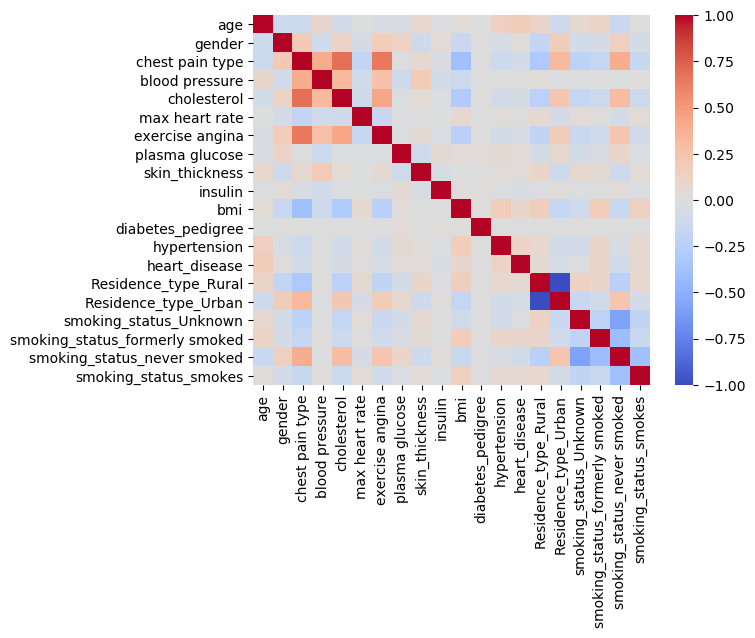

<Figure size 10000x10000 with 0 Axes>

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

# generating a heatmap using a correlation matrix generated via Pandas
sb.heatmap(encoded.corr(), cmap="coolwarm")
plt.figure(figsize=(100,100))
plt.show()

We see many values are not considered very related in many areas. We have some stronger relations 
for things like blood pressure and exercise angina, which makes sense as higher pressure results means a higher strain on blood vessels and likely a further narrowing of blood vessels when exercising, potentially leading to exercise angina. We see other relations that make sense, like chest pain type and blood pressure, age and heart disease/hypertension. There are some relations that are interesting but inconsiquential, like skin thickness and residence type. Otherwise heart rate and chest pain are commonly related due to them being common symptoms of heart attack. 

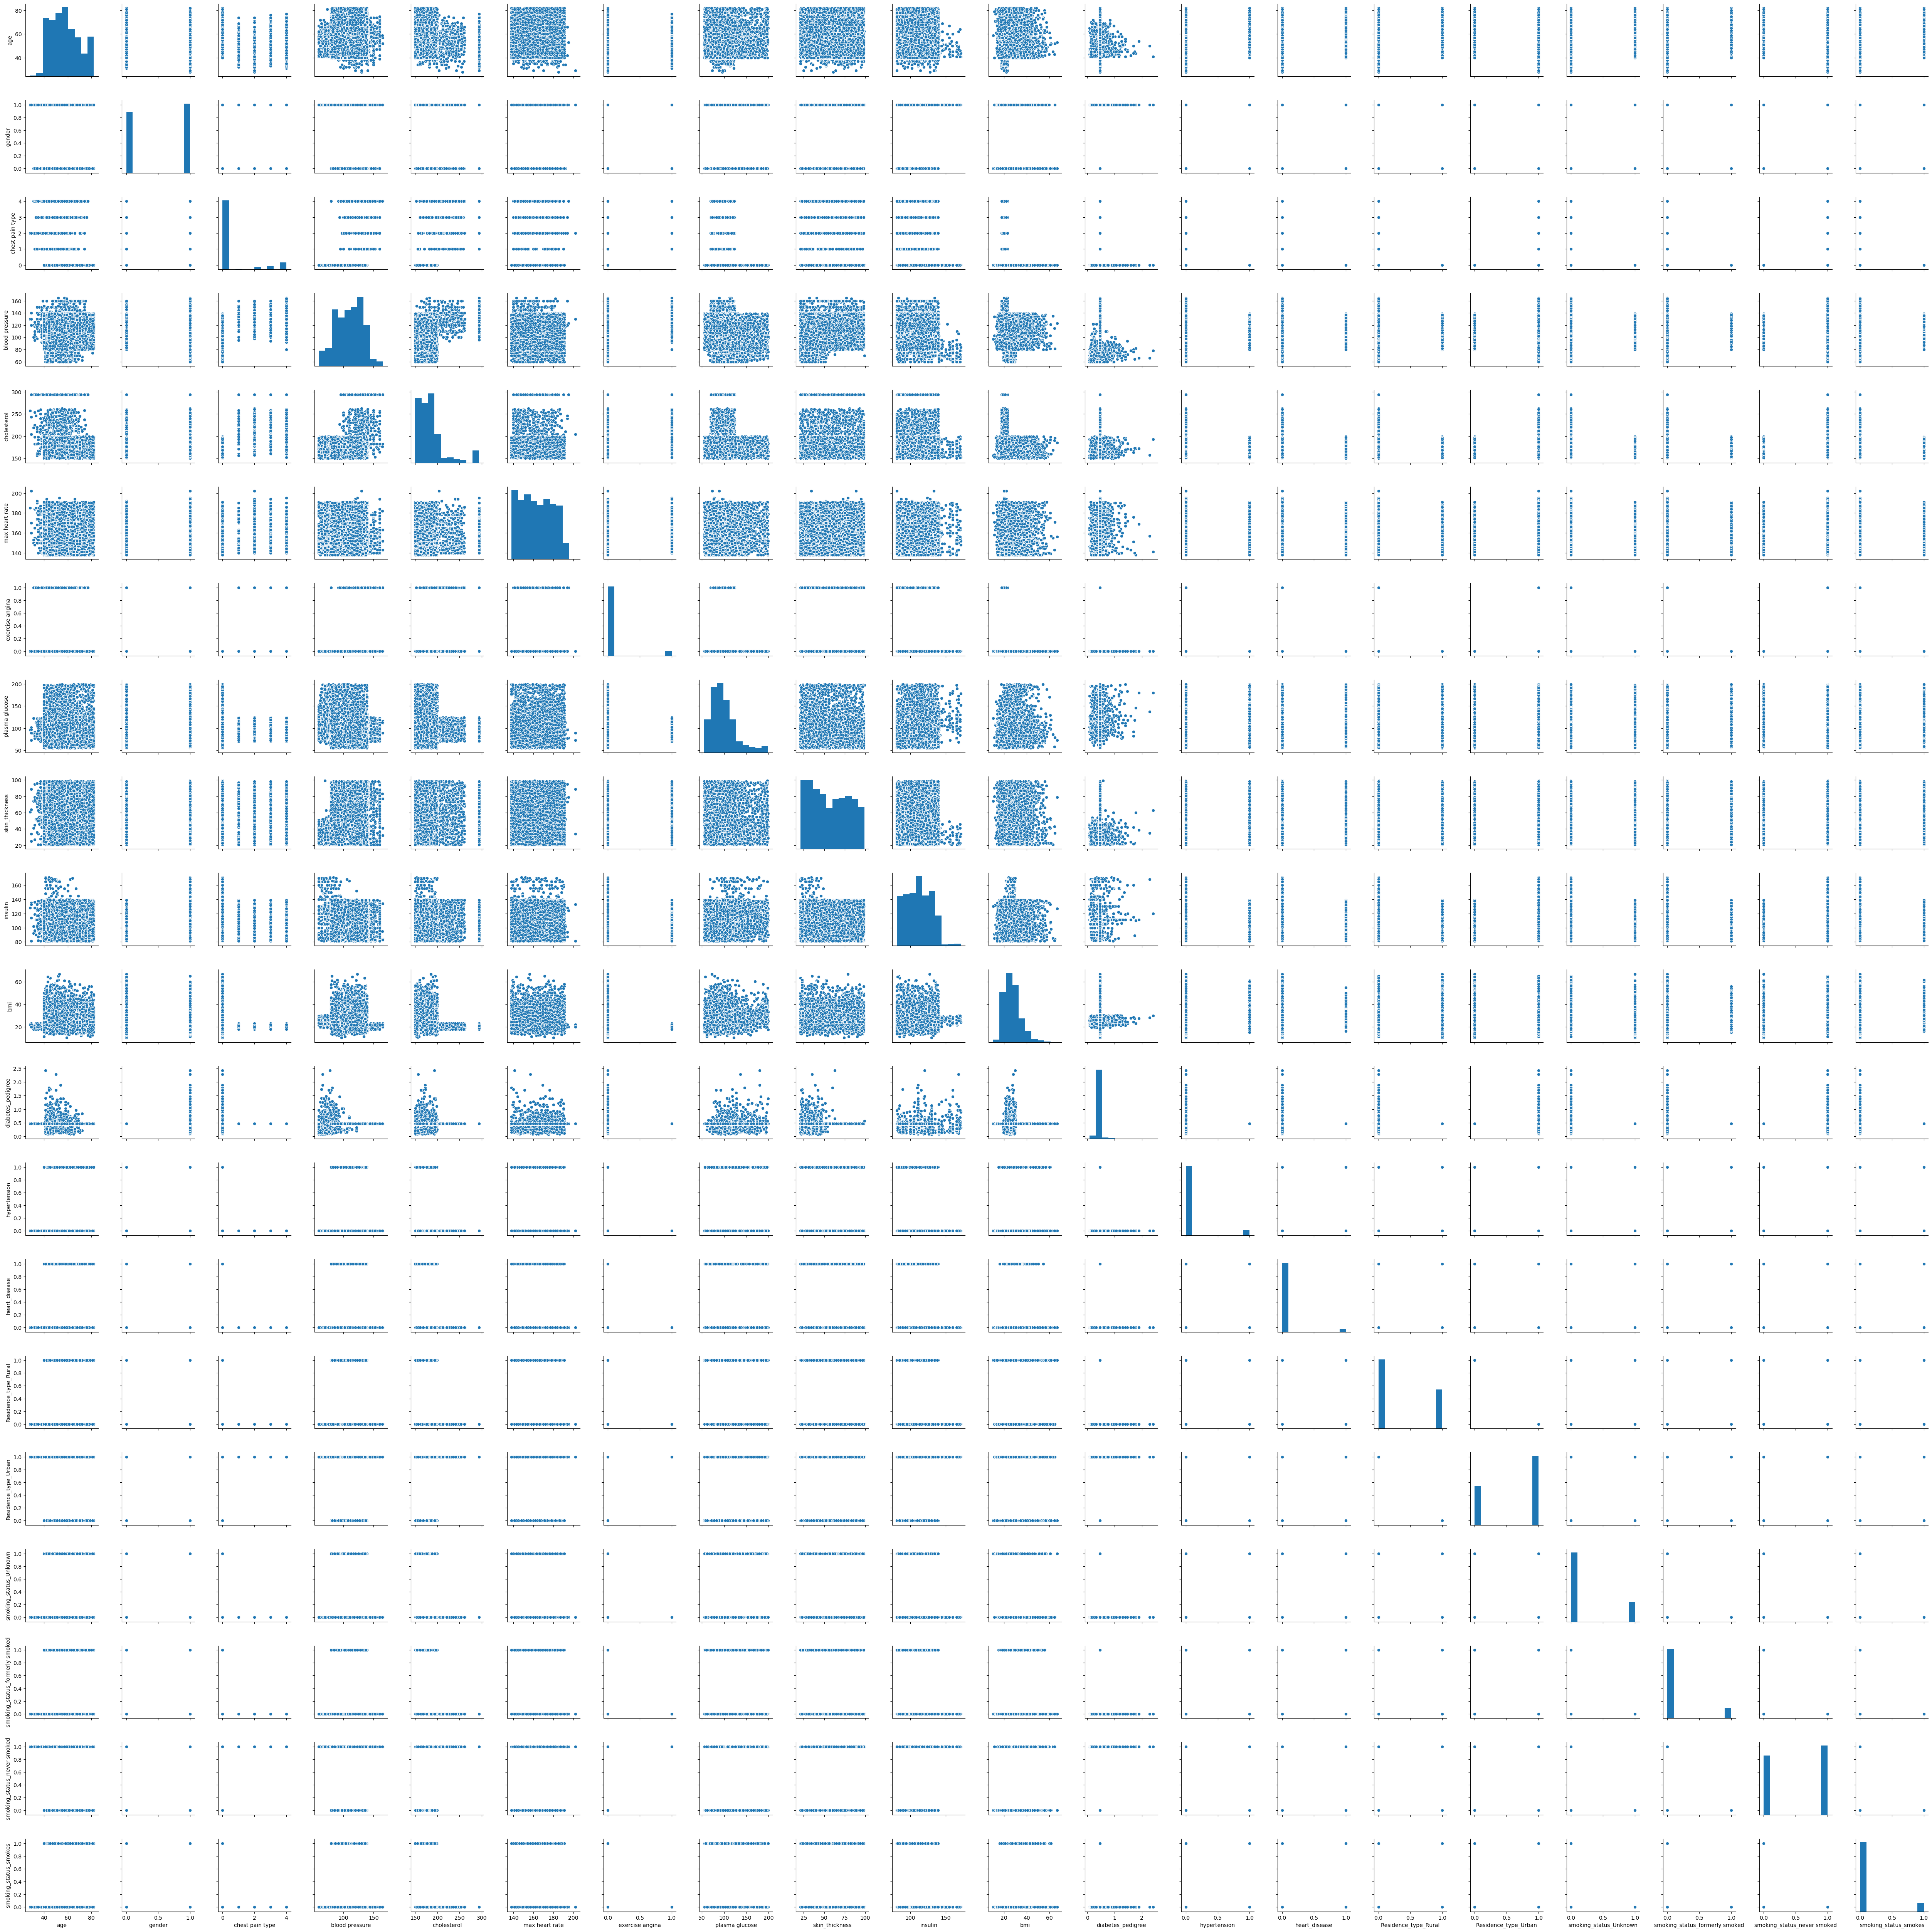

In [11]:
# generating a pairplot to see a better representation of these patterns
sb.pairplot(encoded) # commented out for timesaving purposes
plt.show() # saved original image to local disk. Final version will contain image

We see some data has good distributions via the barplots.<br>
We see our binary values generally have poor distributions, though in this context that is a good thing!
We don't see very strong patterns in the scatterplots in terms of simple lines or curves but we do see that are some relations to be seen. Blood pressure and chest pain type have a unique distribution as higher blood pressures when compared to a given chest pain has a given threshold within each type of pain. Cholesterol has lower rates when related to chest pain type, while it has little affect on the rest of our chest pain classes. We see certain groupings as well, like Cholesterol and BMI, where there are certain patterns where we see more stable distributions as cholesteral rises. Many other plots show large blocks where it is difficult to see individual patterns in them but as a whole we may see different results.<br><br>
Otherwise we see there is a lot of 'noise' in our data so fine tuning smaller clusters main not be possible as smaller clusters are very sensitive to noise when using DBSCAN clustering

## Step 2.1, Scaling our data

In [12]:
from sklearn.preprocessing import MinMaxScaler

#scaling our data with the sklearn MinMaxScaler
# This will turn all datapoints to a value between 0 and 1
scaler = MinMaxScaler() #Initializing our scaler
scaled_data = scaler.fit_transform(encoded) # this takes our encoded data and transforms it
# while learning the pattern it needs to follow to scale the data
# it learns the mean, standard deviation and parameters it will transform
# Thus fit_transform
scaled_data[:5] # printing up to 5 entries to ensure data is good

array([[0.22222222, 1.        , 0.5       , 0.76190476, 1.        ,
        0.53125   , 0.        , 0.3675285 , 0.28205128, 0.12222222,
        0.1539823 , 0.16626218, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.38888889, 0.        , 0.75      , 0.95238095, 0.20833333,
        0.28125   , 0.        , 0.1381707 , 0.33333333, 0.1       ,
        0.13628319, 0.16626218, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.16666667, 1.        , 0.5       , 0.66666667, 1.        ,
        0.28125   , 0.        , 0.29802613, 0.41025641, 0.23333333,
        0.22477876, 0.16626218, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.37037037, 0.        , 1.        , 0.74285714, 0.44444444,
        0.28125   , 1.        , 0.11731999, 0.38461538, 0.41111111,
        0.13628319, 0.16626218, 0.        , 0

## Step 2.2, Modelling our data

### Danton's Contributions

In [13]:
from sklearn.cluster import DBSCAN

# we are using a model from a library. It is a mathimatical formula that will help
# us find patterns in data.

We have some hyperparameters we will want to play with, testing to see what version
of our model will preform best! This is a quick copy/paste of the Hyperparameters<br>
eps : float, default=0.5<br>
    The maximum distance between two samples for one to be considered<br>
    as in the neighborhood of the other. This is not a maximum bound<br>
    on the distances of points within a cluster. This is the most<br>
    important DBSCAN parameter to choose appropriately for your data set<br>
    and distance function<br><br>
    
min_samples : int, default=5<br>
    The number of samples (or total weight) in a neighborhood for a point<br>
    to be considered as a core point. This includes the point itself.<br><br>
    
metric : string, or callable, default='euclidean'<br>
    The metric to use when calculating distance between instances in a<br>
    feature array. If metric is a string or callable, it must be one of<br>
    the options allowed by :func:`sklearn.metrics.pairwise_distances` for<br>
    its metric parameter.<br>
    If metric is "precomputed", X is assumed to be a distance matrix and<br>
    must be square. X may be a :term:`Glossary <sparse graph>`, in which<br>
    case only "nonzero" elements may be considered neighbors for DBSCAN.<br><br>
    
metric_params : dict, default=None<br>
    Additional keyword arguments for the metric function.<br><br>
    
algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'<br>
    The algorithm to be used by the NearestNeighbors module<br>
    to compute pointwise distances and find nearest neighbors.<br>
    See NearestNeighbors module documentation for details.<br><br>
    
leaf_size : int, default=30<br>
    Leaf size passed to BallTree or cKDTree. This can affect the speed<br>
    of the construction and query, as well as the memory required<br>
    to store the tree. The optimal value depends<br>
    on the nature of the problem.<br><br>

p : float, default=None<br>
    The power of the Minkowski metric to be used to calculate distance<br>
    between points.<br><br>

n_jobs : int or None, default=None<br>
    The number of parallel jobs to run.<br>
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.<br>
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`<br>
    for more details.<br><br>

In [14]:
# with this information lets design a dictionary list of hyperparameters for our 
# models
#lets make 10 different sets of hyperparameters to find the best model
 # we are ignoring some hyperparameters as they are a bit more advanced for what I am attempting at this time
            # This one will be a default of all settings
hyparms = [{'EPS': 0.5,'Min_Samples': 5,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30,'P': None},
           # Lets try doubling our EPS
           {'EPS': 1,'Min_Samples': 5,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30,'P': None},
           # Lets adjust the P setting on a default system
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30,'P': 0.5},
           # Lets try doing two for a P value
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30,'P': 2},
           # Lets use some different distance metrics to test which may fit out data better
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'cityblock','Algorithm': 'auto','Leaf_size': 30,'P': None},
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'cosine','Algorithm': 'auto','Leaf_size': 30,'P': None},
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'manhattan','Algorithm': 'auto','Leaf_size': 30,'P': None},
           # Lets try some combinations to see what may fit well in our first round of testing
           {'EPS': 1.0,'Min_Samples': 3,'Metric': 'cosine','Algorithm': 'auto','Leaf_size': 20,'P': 0.5},
           {'EPS': 0.2,'Min_Samples': 10,'Metric': 'cityblock','Algorithm': 'brute','Leaf_size': 30,'P': None},
           {'EPS': 0.1,'Min_Samples': 3,'Metric': 'euclidean','Algorithm': 'brute','Leaf_size': 40,'P': None}
          ]# with the MinMaxScaler, we should avoid using large numbers

In [15]:
# testing our values
hyparms[1]

{'EPS': 1,
 'Min_Samples': 5,
 'Metric': 'euclidean',
 'Algorithm': 'auto',
 'Leaf_size': 30,
 'P': None}

In [16]:
# setting up a dataframe to help catch all our results
resultsD = pd.DataFrame(columns=['EPS','Min Samples','Metric',
                                 'Algorithm', 'Leaf size','P', 'Silhouette Score', 'DBI'])
index = 0# an indexing value for our dataframe

In [17]:
# importing our metrics for grading how well our algorithm clusters the data
from sklearn.metrics import silhouette_score as s_score # Higher is better
from sklearn.metrics import davies_bouldin_score as dbs # Lower is better

# lets set up a list to hold all our models so we can just take what works best in the end
db_clusts = []

#### What are Silhouette Scores and Davies Bouldin Indexes/Scores?
##### Silhouette Score
Silhouette Scores are generally good for measuring how related a given object is to it's cluster centroid (The central point of a defined cluster).
This is useful for deciding whether or not our clusters are well defined or have large amounts of overlap.
This score is generally considered adequate when >0 with 1 being a perfect score. Negatives suggest poor cluster relations.<br>
##### Davies-Bouldin Score
This is a score that is great for looking at how defined clusters are globally. A Higher score can suggest that 
clusters are very mixed together or we don't have enough clusters. Lower scores are desired as >2 is considered very bad,
while <1 is a very good score. 0 is a perfect score but you likely will never get one with real world datasets. 

In [18]:
# let's loop through our models and run some clustering algorithms!
for hyp in hyparms:
    # setting up our model and it's parameteres
    db_scan = DBSCAN(eps=hyp['EPS'], 
                     min_samples=hyp['Min_Samples'], 
                     metric=hyp['Metric'], 
                     algorithm=hyp['Algorithm'], 
                     leaf_size=hyp['Leaf_size'], 
                     p=hyp['P'])
    
    # clustering the data and predicting labels of scaled data
    preds = db_scan.fit_predict(scaled_data)
    try:# this section tests how well our models preform
        ss = s_score(scaled_data, preds)
    except Exception as e: # if there is a problem we do not stop but catch the error and return a 'Bad' value
        print('Silhouette', e) # for my knowledge of what errors occur
        ss = -1
    try:
        david = dbs(scaled_data, preds)
    except Exception as e:
        print('David: ', e)
        david = 2
    
    # now lets put everything into a dataframe entry at index
    resultsD.loc[index] = {'EPS': hyp['EPS'],
                           'Min Samples': hyp['Min_Samples'],
                           'Metric': hyp['Metric'],
                           'Algorithm': hyp['Algorithm'],
                           'Leaf size': hyp['Leaf_size'],
                           'P': hyp['P'],
                           'Silhouette Score': ss,
                           'DBI': david}
    # finishing everything up
    db_clusts.append(db_scan)# recording the clustering algorithm
    index = index+1# moving our index by 1

Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [19]:
# we had some very bad clusters but some successes as well!
print(resultsD.loc[:,['Silhouette Score','DBI']]) #printing out only scores

   Silhouette Score       DBI
0          0.271114  1.392455
1          0.339563  1.161959
2          0.271114  1.392455
3          0.271114  1.392455
4         -0.187248  1.170952
5         -1.000000  2.000000
6         -0.187248  1.170952
7         -1.000000  2.000000
8         -1.000000  2.000000
9         -1.000000  2.000000


We see at index 1 we have a lead at finding our best model, what parameters are working?<br>
We also see that a few models preformed the same despite different hyperparameters

In [20]:
# Lets look at our first five, they were the most successful
print(resultsD.loc[:4,['EPS','Min Samples','Metric','Algorithm','Leaf size','P']])

   EPS Min Samples     Metric Algorithm Leaf size     P
0  0.5           5  euclidean      auto        30   NaN
1  1.0           5  euclidean      auto        30   NaN
2  0.5           5  euclidean      auto        30   0.5
3  0.5           5  euclidean      auto        30     2
4  0.5           5  cityblock      auto        30  None


Well, Euclidean did well for our metric, maybe we should attempt to use some new leaf sizes
and some different sample sizes. Looks like P doesn't do much for our accuracies in this dataset so we will assume the 
default is enough for the rest of our attempts

In [21]:
# Setting up a new dictionary list for some new experiments
# we are using defaults for the rest of our experiments now
hyparms2 = [{'EPS': 1.4,'Min_Samples': 50,'Leaf_size': 50},
           {'EPS': 1.25,'Min_Samples': 60,'Leaf_size': 240},
           {'EPS': 0.9,'Min_Samples': 5,'Leaf_size': 30},
           {'EPS': 0.95,'Min_Samples': 5,'Leaf_size': 30},
           {'EPS': 0.9,'Min_Samples': 3,'Leaf_size': 50},
           {'EPS': 0.95,'Min_Samples': 100,'Leaf_size': 30},
           {'EPS': 0.9,'Min_Samples': 50,'Leaf_size': 50},
           {'EPS': 0.7,'Min_Samples': 5,'Leaf_size': 50},
           {'EPS': 0.8,'Min_Samples': 3,'Leaf_size': 50},]

In [22]:
#resusing our loop from earlier with minor modifications
for hyp in hyparms2:
    # setting up our model and it's parameteres
    db_scan = DBSCAN(eps=hyp['EPS'], 
                     min_samples=hyp['Min_Samples'], 
                     leaf_size=hyp['Leaf_size'])
    
    # clustering the data and predicting labels of scaled data
    preds = db_scan.fit_predict(scaled_data)
    try:# this section tests how well our models preform
        ss = s_score(scaled_data, preds)
    except Exception as e: # if there is a problem we do not stop but catch the error and return a 'Bad' value
        print('Silhouette', e) # for my knowledge of what errors occur
        ss = -1
    try:
        david = dbs(scaled_data, preds)
    except Exception as e:
        print('David: ', e)
        david = 2
    
    # now lets put everything into a dataframe entry at index
    resultsD.loc[index] = {'EPS': hyp['EPS'],
                           'Min Samples': hyp['Min_Samples'],
                           'Metric': 'euclidean',
                           'Algorithm': 'auto',
                           'Leaf size': hyp['Leaf_size'],
                           'P': 'None',
                           'Silhouette Score': ss,
                           'DBI': david}
    # finishing everything up
    db_clusts.append(db_scan)# recording the clustering algorithm
    index = index+1# moving our index by 1

In [23]:
# printing index 1 scores for comparison!
print(resultsD.loc[1,['Silhouette Score','DBI']])
print(resultsD.loc[9:,['Silhouette Score','DBI']]) #printing out only scores after first results

Silhouette Score    0.339563
DBI                  1.16196
Name: 1, dtype: object
    Silhouette Score       DBI
9          -1.000000  2.000000
10          0.348855  1.192692
11          0.345403  1.111403
12          0.339153  1.185017
13          0.339563  1.161959
14          0.340423  1.204593
15          0.287302  1.427064
16          0.296326  1.475929
17          0.328407  1.329962
18          0.338142  1.255339


In [24]:
# Lets look at some good results compared to 1!
print(resultsD.loc[[1,10,11,13,18],['EPS','Min Samples','Leaf size','Silhouette Score','DBI']])

     EPS Min Samples Leaf size  Silhouette Score       DBI
1   1.00           5        30          0.339563  1.161959
10  1.40          50        50          0.348855  1.192692
11  1.25          60       240          0.345403  1.111403
13  0.95           5        30          0.339563  1.161959
18  0.80           3        50          0.338142  1.255339


In [25]:
# One more test to see how well 15 does when samples is lowered slightly with a larger leaf size
db_scan = DBSCAN(eps=1.3, 
                 min_samples=20, 
                 leaf_size=120)
    
    # clustering the data and predicting labels of scaled data
preds = db_scan.fit_predict(scaled_data)
try:# this section tests how well our models preform
    ss = s_score(scaled_data, preds)
except Exception as e: # if there is a problem we do not stop but catch the error and return a 'Bad' value
    print('Silhouette', e) # for my knowledge of what errors occur
    ss = -1
try:
    david = dbs(scaled_data, preds)
except Exception as e:
    print('David: ', e)
    david = 2
    
    # now lets put everything into a dataframe entry at index
resultsD.loc[index] = {'EPS': 0.85,
                        'Min Samples': 20,
                        'Metric': 'euclidean',
                        'Algorithm': 'auto',
                        'Leaf size': 120,
                        'P': 'None',
                        'Silhouette Score': ss,
                        'DBI': david}

In [26]:
resultsD.loc[19]

EPS                      0.85
Min Samples                20
Metric              euclidean
Algorithm                auto
Leaf size                 120
P                        None
Silhouette Score     0.348855
DBI                   1.19269
Name: 19, dtype: object

### Step 2.3, Which model is the best? 
This is a tough choice, as we need to look at the domain of our data to decide what combination of scores is
best for this model. We should prioritize Silhouette score over DBI as we want clusters that are more related over 
clusters that are more defined and spread out! But we also want well defined and seperated clusters!<br>
We have three models that are so far preforming best are models in terms of both metrics at index 1, 14, and 19! 

In [27]:
print(resultsD.loc[[1,11,19],['Silhouette Score','DBI']])

    Silhouette Score       DBI
1           0.339563  1.161959
11          0.345403  1.111403
19          0.348855  1.192692


We see the best combination of our scores suggesting the clusters are spaced well enough, defined to
a decent degree, and with one of our silhouette score is Model 11!<br>
All hail the champion model!

In [28]:
model = db_clusts[11]
print(resultsD.loc[11])

EPS                      1.25
Min Samples                60
Metric              euclidean
Algorithm                auto
Leaf size                 240
P                        None
Silhouette Score     0.345403
DBI                    1.1114
Name: 11, dtype: object


## Step 3, Making Conclusions 


In [29]:
#gathering our labels
labels = model.fit_predict(scaled_data)

In [30]:
#how many clusters do we have!
labels.max()

7

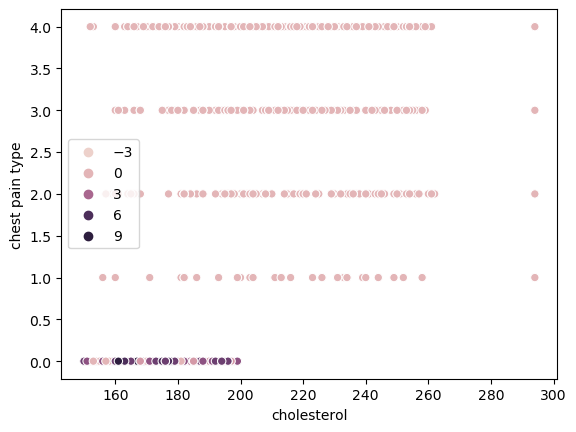

In [31]:
# what two columns will be good for analysis of our clustering?
#Lets take a look at two columns and see what they are clustered in! Or maybe even more!

sb.scatterplot(x=encoded['cholesterol'],y=encoded['chest pain type'],hue=labels,data=encoded)
plt.show()

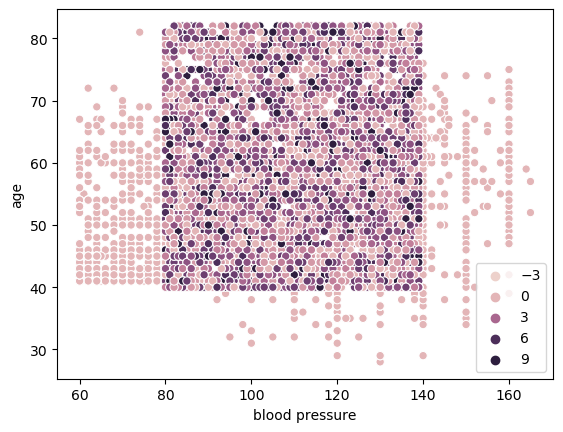

In [32]:
sb.scatterplot(x=encoded['blood pressure'],y=encoded['age'],hue=labels,data=encoded)
plt.show()

In [33]:
#Time to sort our data into their respective clusters for easier examination!
encoded['Cluster Label'] = labels
encoded.head()# this is setting our cluster labels into our encoded dataframe

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin  ...  \
0              0.0           108.0            43.0     92.0  ...   
1              0.0            75.0            47.0     90.0  ...   
2              0.0            98.0            53.0    102.0  ...   
3              1.0            72.0            51.0    118.0  ...   
4              0.0           108.0            90.0     83.0  ...   

   diabetes_pedigree  hypertension  heart_disease  Residence_type_Rural  \
0           0.467386           0.0            0.0                     0   
1           0.467386           0.0            0.0                     0   
2           0.467386           0.0            0.0                     0   
3           0.467386           0.0            0.0                     0   
4           0.467386           0.0            0.0                     0   

   Residence_type_Urban  smoking_status_Unknown  \
0                     1                       0   
1                     1                       0   
2                     1                       0   
3                     1                       0   
4                     1                       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            1   
1                               0                            1   
2                               0                            1   
3                               0                            1   
4                               0                            1   

   smoking_status_smokes  Cluster Label  
0                      0              0  
1                      0              0  
2                      0              0  
3                      0              0  
4                      0              0  

[5 rows x 21 columns]

In [34]:
clusframes = []
for x in range(labels.min(), labels.max()):# a loop with the range of our labels
    clusframes.append(encoded[encoded['Cluster Label']==x])
    #this takes a snapshot of all data with a given label into a list of dataframes

In [35]:
#ensuring pandas prints all columns
pd.set_option('display.max_columns', None)

#### Cluster 0, Noise
This cluster is not applicable for anything and was deemed noise to our data. They have a high heartrate, hypertension, potential heart disease, and are of an advanced age so we should assume they are of higher care priority. Though this is an outlier vs all other data I can assume that there is a pre-existing condition coming in for an emergency, life threatening or not.

In [36]:
clusframes[0].describe()

age  gender  chest pain type  blood pressure  cholesterol  \
count   1.0     1.0              1.0             1.0          1.0   
mean   68.0     0.0              0.0           129.0        198.0   
std     NaN     NaN              NaN             NaN          NaN   
min    68.0     0.0              0.0           129.0        198.0   
25%    68.0     0.0              0.0           129.0        198.0   
50%    68.0     0.0              0.0           129.0        198.0   
75%    68.0     0.0              0.0           129.0        198.0   
max    68.0     0.0              0.0           129.0        198.0   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count             1.0              1.0            1.00             1.0   
mean            178.0              0.0          192.39            85.0   
std               NaN              NaN             NaN             NaN   
min             178.0              0.0          192.39            85.0   
25%             178.0              0.0          192.39            85.0   
50%             178.0              0.0          192.39            85.0   
75%             178.0              0.0          192.39            85.0   
max             178.0              0.0          192.39            85.0   

       insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
count      1.0   1.0           1.000000           1.0            1.0   
mean     136.0  31.0           0.467386           1.0            1.0   
std        NaN   NaN                NaN           NaN            NaN   
min      136.0  31.0           0.467386           1.0            1.0   
25%      136.0  31.0           0.467386           1.0            1.0   
50%      136.0  31.0           0.467386           1.0            1.0   
75%      136.0  31.0           0.467386           1.0            1.0   
max      136.0  31.0           0.467386           1.0            1.0   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                   1.0                   1.0                     1.0   
mean                    1.0                   0.0                     1.0   
std                     NaN                   NaN                     NaN   
min                     1.0                   0.0                     1.0   
25%                     1.0                   0.0                     1.0   
50%                     1.0                   0.0                     1.0   
75%                     1.0                   0.0                     1.0   
max                     1.0                   0.0                     1.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                             1.0                          1.0   
mean                              0.0                          0.0   
std                               NaN                          NaN   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  Cluster Label  
count                    1.0            1.0  
mean                     0.0           -1.0  
std                      NaN            NaN  
min                      0.0           -1.0  
25%                      0.0           -1.0  
50%                      0.0           -1.0  
75%                      0.0           -1.0  
max                      0.0           -1.0

#### Cluster 1, High Risk or Highest Priority Inpatients
This seems to be our largest group and after considering all other clusters this is likely our high risk group. These are likely individuals facing seious injury or health events that require immediate action like heart attacks, diabetic complications, and other dangerous conditions.

In [37]:
clusframes[1].describe()

age       gender  chest pain type  blood pressure  cholesterol  \
count  2785.000000  2785.000000      2785.000000     2785.000000  2785.000000   
mean     54.506284     0.682944         1.322442      109.094434   200.114183   
std      10.744287     0.465413         1.697324       26.545181    43.006063   
min      28.000000     0.000000         0.000000       60.000000   150.000000   
25%      46.000000     0.000000         0.000000       85.000000   170.000000   
50%      54.000000     1.000000         0.000000      112.000000   186.000000   
75%      61.000000     1.000000         3.000000      130.000000   218.000000   
max      82.000000     1.000000         4.000000      165.000000   294.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count     2785.000000      2785.000000     2785.000000     2785.000000   
mean       161.530341         0.154399      102.832610       52.468941   
std         15.165747         0.361395       27.634466       22.897366   
min        138.000000         0.000000       55.220000       21.000000   
25%        148.000000         0.000000       83.000000       32.000000   
50%        160.000000         0.000000       99.000000       47.000000   
75%        174.000000         0.000000      116.000000       73.000000   
max        202.000000         1.000000      199.000000       99.000000   

           insulin          bmi  diabetes_pedigree  hypertension  \
count  2785.000000  2785.000000        2785.000000   2785.000000   
mean    111.800359    25.075943           0.467386      0.036625   
std      18.245896     6.268876           0.162337      0.187872   
min      81.000000    14.100000           0.078000      0.000000   
25%      97.000000    21.000000           0.467386      0.000000   
50%     111.000000    23.000000           0.467386      0.000000   
75%     125.000000    28.000000           0.467386      0.000000   
max     171.000000    64.800000           2.420000      1.000000   

       heart_disease  Residence_type_Rural  Residence_type_Urban  \
count    2785.000000                2785.0                2785.0   
mean        0.016517                   0.0                   1.0   
std         0.127476                   0.0                   0.0   
min         0.000000                   0.0                   1.0   
25%         0.000000                   0.0                   1.0   
50%         0.000000                   0.0                   1.0   
75%         0.000000                   0.0                   1.0   
max         1.000000                   0.0                   1.0   

       smoking_status_Unknown  smoking_status_formerly smoked  \
count                  2785.0                          2785.0   
mean                      0.0                             0.0   
std                       0.0                             0.0   
min                       0.0                             0.0   
25%                       0.0                             0.0   
50%                       0.0                             0.0   
75%                       0.0                             0.0   
max                       0.0                             0.0   

       smoking_status_never smoked  smoking_status_smokes  Cluster Label  
count                       2785.0                 2785.0         2785.0  
mean                           1.0                    0.0            0.0  
std                            0.0                    0.0            0.0  
min                            1.0                    0.0            0.0  
25%                            1.0                    0.0            0.0  
50%                            1.0                    0.0            0.0  
75%                            1.0                    0.0            0.0  
max                            1.0                    0.0            0.0

#### Cluster 2, Low Risk
This group is fairly healthy of rural non smokers. We aren't seeing chest pains of any kind but with thicker skin we might be seeing rural labour workers coming in with various non life threatening issues. This seems to be a very low risk group. 

In [38]:
clusframes[2].describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  960.000000  960.000000            960.0      960.000000   960.000000   
mean    59.627083    0.364583              0.0      109.996875   174.417708   
std     12.542171    0.481564              0.0       17.273093    14.271664   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     49.000000    0.000000              0.0       95.000000   162.000000   
50%     58.000000    0.000000              0.0      111.000000   174.000000   
75%     70.000000    1.000000              0.0      125.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      960.000000            960.0      960.000000      960.000000   
mean       165.355208              0.0       96.265906       59.860417   
std         15.345173              0.0       29.778836       22.196236   
min        138.000000              0.0       55.120000       21.000000   
25%        152.000000              0.0       75.880000       41.000000   
50%        165.000000              0.0       90.775000       61.000000   
75%        179.000000              0.0      107.982500       79.000000   
max        191.000000              0.0      198.240000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  960.000000  960.000000       9.600000e+02    960.000000     960.000000   
mean   110.997917   29.688750       4.673860e-01      0.135417       0.045833   
std     16.846358    7.020629       2.221603e-16      0.342346       0.209233   
min     81.000000   11.500000       4.673860e-01      0.000000       0.000000   
25%     97.000000   24.975000       4.673860e-01      0.000000       0.000000   
50%    111.000000   28.600000       4.673860e-01      0.000000       0.000000   
75%    126.000000   33.200000       4.673860e-01      0.000000       0.000000   
max    139.000000   64.400000       4.673860e-01      1.000000       1.000000   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                 960.0                 960.0                   960.0   
mean                    1.0                   0.0                     0.0   
std                     0.0                   0.0                     0.0   
min                     1.0                   0.0                     0.0   
25%                     1.0                   0.0                     0.0   
50%                     1.0                   0.0                     0.0   
75%                     1.0                   0.0                     0.0   
max                     1.0                   0.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           960.0                        960.0   
mean                              0.0                          1.0   
std                               0.0                          0.0   
min                               0.0                          1.0   
25%                               0.0                          1.0   
50%                               0.0                          1.0   
75%                               0.0                          1.0   
max                               0.0                          1.0   

       smoking_status_smokes  Cluster Label  
count                  960.0          960.0  
mean                     0.0            1.0  
std                      0.0            0.0  
min                      0.0            1.0  
25%                      0.0            1.0  
50%                      0.0            1.0  
75%                      0.0            1.0  
max                      0.0            1.0

#### Cluster 3, Low-Medium Risk Inpatients
This is another urban group of those whom smoke but have higher heart rates, ok blood pressure, a thick skin, and are often heavier set than the last group. We are likely seeing urban labour workers with minor to mid tier injuries to extremities that are not directly life threatening upon seeking care. 

In [39]:
clusframes[3].describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  426.000000  426.000000            426.0      426.000000   426.000000   
mean    57.624413    0.429577              0.0      109.361502   172.765258   
std     11.652811    0.495598              0.0       17.541502    14.872045   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     48.000000    0.000000              0.0       93.250000   159.000000   
50%     55.500000    0.000000              0.0      110.000000   172.000000   
75%     66.000000    1.000000              0.0      125.000000   185.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      426.000000            426.0      426.000000      426.000000   
mean       164.899061              0.0       95.878310       59.852113   
std         15.899734              0.0       30.008737       22.551050   
min        138.000000              0.0       55.320000       21.000000   
25%        150.000000              0.0       75.047500       40.000000   
50%        166.000000              0.0       89.905000       60.000000   
75%        179.000000              0.0      108.220000       80.000000   
max        191.000000              0.0      198.360000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  426.000000  426.000000       4.260000e+02    426.000000     426.000000   
mean   109.762911   30.064319       4.673860e-01      0.119718       0.079812   
std     16.813654    6.566291       1.111528e-16      0.325014       0.271321   
min     81.000000   15.700000       4.673860e-01      0.000000       0.000000   
25%     95.000000   25.200000       4.673860e-01      0.000000       0.000000   
50%    110.000000   28.900000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.700000       4.673860e-01      0.000000       0.000000   
max    139.000000   52.700000       4.673860e-01      1.000000       1.000000   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                 426.0                 426.0                   426.0   
mean                    0.0                   1.0                     0.0   
std                     0.0                   0.0                     0.0   
min                     0.0                   1.0                     0.0   
25%                     0.0                   1.0                     0.0   
50%                     0.0                   1.0                     0.0   
75%                     0.0                   1.0                     0.0   
max                     0.0                   1.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           426.0                        426.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  Cluster Label  
count                  426.0          426.0  
mean                     1.0            2.0  
std                      0.0            0.0  
min                      1.0            2.0  
25%                      1.0            2.0  
50%                      1.0            2.0  
75%                      1.0            2.0  
max                      1.0            2.0

#### Cluster 4, Medium Risk Inpatients
This is an urban group whom seem to of a more advanced age with various concerns that do not directly involve heart conditions/issues. This group consists of those whom are former smokers. Likely a less healthy group but are generally low risk, though some border points in this cluster are of medium risk

In [40]:
clusframes[4].describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  456.000000  456.000000            456.0      456.000000   456.000000   
mean    61.872807    0.451754              0.0      111.083333   174.043860   
std     12.130121    0.498214              0.0       17.417740    14.614393   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     52.000000    0.000000              0.0       96.000000   161.000000   
50%     61.000000    0.000000              0.0      112.000000   174.000000   
75%     72.000000    1.000000              0.0      127.000000   186.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      456.000000            456.0      456.000000      456.000000   
mean       164.392544              0.0       96.411404       58.864035   
std         15.625334              0.0       30.818986       22.642349   
min        138.000000              0.0       55.610000       21.000000   
25%        151.000000              0.0       75.710000       39.000000   
50%        164.000000              0.0       89.305000       57.000000   
75%        178.000000              0.0      106.745000       78.000000   
max        191.000000              0.0      198.320000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  456.000000  456.000000       4.560000e+02    456.000000     456.000000   
mean   110.804825   30.462061       4.673860e-01      0.151316       0.092105   
std     16.990600    7.064845       1.667164e-16      0.358750       0.289492   
min     81.000000   15.000000       4.673860e-01      0.000000       0.000000   
25%     97.000000   25.775000       4.673860e-01      0.000000       0.000000   
50%    112.000000   29.300000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.400000       4.673860e-01      0.000000       0.000000   
max    139.000000   55.700000       4.673860e-01      1.000000       1.000000   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                 456.0                 456.0                   456.0   
mean                    0.0                   1.0                     0.0   
std                     0.0                   0.0                     0.0   
min                     0.0                   1.0                     0.0   
25%                     0.0                   1.0                     0.0   
50%                     0.0                   1.0                     0.0   
75%                     0.0                   1.0                     0.0   
max                     0.0                   1.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           456.0                        456.0   
mean                              1.0                          0.0   
std                               0.0                          0.0   
min                               1.0                          0.0   
25%                               1.0                          0.0   
50%                               1.0                          0.0   
75%                               1.0                          0.0   
max                               1.0                          0.0   

       smoking_status_smokes  Cluster Label  
count                  456.0          456.0  
mean                     0.0            3.0  
std                      0.0            0.0  
min                      0.0            3.0  
25%                      0.0            3.0  
50%                      0.0            3.0  
75%                      0.0            3.0  
max                      0.0            3.0

#### Cluster 5, Low Risk Inpatients
This is a group that may fall into a lower medium risk as well. These are rural former smokers that likely have higher blood pressure, have higher heart rates but are of slimmer builds. This may be a group that has a higher risk of diabetic issues thus they may require more immediate care on average.

In [41]:
clusframes[5].describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  761.000000  761.000000            761.0      761.000000   761.000000   
mean    58.541393    0.452037              0.0      110.529566   175.275953   
std     12.215335    0.498022              0.0       17.372679    14.909819   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     48.000000    0.000000              0.0       96.000000   162.000000   
50%     57.000000    0.000000              0.0      110.000000   176.000000   
75%     68.000000    1.000000              0.0      126.000000   189.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      761.000000            761.0      761.000000      761.000000   
mean       164.773982              0.0       94.306124       60.065703   
std         15.398185              0.0       27.198511       22.327194   
min        138.000000              0.0       55.230000       21.000000   
25%        152.000000              0.0       76.120000       42.000000   
50%        165.000000              0.0       89.720000       60.000000   
75%        178.000000              0.0      108.230000       78.000000   
max        191.000000              0.0      197.790000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  761.000000  761.000000       7.610000e+02    761.000000     761.000000   
mean   110.304862   25.648883       4.673860e-01      0.034166       0.036794   
std     17.197815    7.797594       1.666430e-16      0.181774       0.188379   
min     81.000000   10.300000       4.673860e-01      0.000000       0.000000   
25%     95.000000   19.500000       4.673860e-01      0.000000       0.000000   
50%    111.000000   24.400000       4.673860e-01      0.000000       0.000000   
75%    126.000000   29.900000       4.673860e-01      0.000000       0.000000   
max    139.000000   66.800000       4.673860e-01      1.000000       1.000000   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                 761.0                 761.0                   761.0   
mean                    1.0                   0.0                     1.0   
std                     0.0                   0.0                     0.0   
min                     1.0                   0.0                     1.0   
25%                     1.0                   0.0                     1.0   
50%                     1.0                   0.0                     1.0   
75%                     1.0                   0.0                     1.0   
max                     1.0                   0.0                     1.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           761.0                        761.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  Cluster Label  
count                  761.0          761.0  
mean                     0.0            4.0  
std                      0.0            0.0  
min                      0.0            4.0  
25%                      0.0            4.0  
50%                      0.0            4.0  
75%                      0.0            4.0  
max                      0.0            4.0

#### Cluster 6, Low Risk Inpatients
Urban potential smokers whom are likely low risk with potential for medium risk in border points. Otherwise this group follows the average set by other low risk groups

In [42]:
clusframes[6].describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  782.000000  782.000000            782.0      782.000000   782.000000   
mean    59.488491    0.465473              0.0      108.849105   174.283887   
std     12.427583    0.499126              0.0       17.383090    14.384467   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     49.250000    0.000000              0.0       93.000000   162.000000   
50%     58.000000    0.000000              0.0      110.000000   174.000000   
75%     70.000000    1.000000              0.0      124.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      782.000000            782.0      782.000000      782.000000   
mean       164.592072              0.0       94.123964       59.106138   
std         15.801946              0.0       26.364913       21.848336   
min        138.000000              0.0       55.280000       21.000000   
25%        151.250000              0.0       76.652500       40.000000   
50%        164.000000              0.0       88.280000       59.000000   
75%        179.000000              0.0      105.765000       77.000000   
max        191.000000              0.0      198.020000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  782.000000  782.000000       7.820000e+02    782.000000     782.000000   
mean   111.130435   25.952685       4.673860e-01      0.031969       0.024297   
std     16.934108    8.105359       1.110934e-16      0.176031       0.154067   
min     81.000000   11.300000       4.673860e-01      0.000000       0.000000   
25%     96.000000   19.600000       4.673860e-01      0.000000       0.000000   
50%    112.000000   24.750000       4.673860e-01      0.000000       0.000000   
75%    126.000000   31.000000       4.673860e-01      0.000000       0.000000   
max    139.000000   61.200000       4.673860e-01      1.000000       1.000000   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                 782.0                 782.0                   782.0   
mean                    0.0                   1.0                     1.0   
std                     0.0                   0.0                     0.0   
min                     0.0                   1.0                     1.0   
25%                     0.0                   1.0                     1.0   
50%                     0.0                   1.0                     1.0   
75%                     0.0                   1.0                     1.0   
max                     0.0                   1.0                     1.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           782.0                        782.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  Cluster Label  
count                  782.0          782.0  
mean                     0.0            5.0  
std                      0.0            0.0  
min                      0.0            5.0  
25%                      0.0            5.0  
50%                      0.0            5.0  
75%                      0.0            5.0  
max                      0.0            5.0

#### Cluster 7, Medium to Low Risk inpatients
Generally lower risk rural smokers. We have some potential for more urgent issues but with no chest pains and decent oxygen distribution we can assume the general trend is low risk

In [43]:
clusframes[7].describe()

age      gender  chest pain type  blood pressure  cholesterol  \
count  363.000000  363.000000            363.0      363.000000   363.000000   
mean    58.079890    0.424242              0.0      111.506887   175.402204   
std     11.564458    0.494910              0.0       17.747829    14.038943   
min     40.000000    0.000000              0.0       80.000000   150.000000   
25%     49.000000    0.000000              0.0       94.000000   163.000000   
50%     57.000000    0.000000              0.0      113.000000   175.000000   
75%     66.000000    1.000000              0.0      126.000000   187.000000   
max     82.000000    1.000000              0.0      139.000000   199.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count      363.000000            363.0      363.000000      363.000000   
mean       165.710744              0.0       96.298485       59.438017   
std         15.141381              0.0       28.554712       22.677742   
min        138.000000              0.0       55.930000       21.000000   
25%        153.000000              0.0       76.380000       39.000000   
50%        166.000000              0.0       91.630000       62.000000   
75%        178.000000              0.0      107.085000       79.000000   
max        191.000000              0.0      198.790000       98.000000   

          insulin         bmi  diabetes_pedigree  hypertension  heart_disease  \
count  363.000000  363.000000       3.630000e+02    363.000000     363.000000   
mean   110.457300   30.767493       4.673860e-01      0.118457       0.074380   
std     16.725117    7.626936       5.558777e-17      0.323595       0.262751   
min     81.000000   15.800000       4.673860e-01      0.000000       0.000000   
25%     96.500000   25.600000       4.673860e-01      0.000000       0.000000   
50%    110.000000   29.400000       4.673860e-01      0.000000       0.000000   
75%    125.000000   34.100000       4.673860e-01      0.000000       0.000000   
max    139.000000   61.600000       4.673860e-01      1.000000       1.000000   

       Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
count                 363.0                 363.0                   363.0   
mean                    1.0                   0.0                     0.0   
std                     0.0                   0.0                     0.0   
min                     1.0                   0.0                     0.0   
25%                     1.0                   0.0                     0.0   
50%                     1.0                   0.0                     0.0   
75%                     1.0                   0.0                     0.0   
max                     1.0                   0.0                     0.0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                           363.0                        363.0   
mean                              0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
25%                               0.0                          0.0   
50%                               0.0                          0.0   
75%                               0.0                          0.0   
max                               0.0                          0.0   

       smoking_status_smokes  Cluster Label  
count                  363.0          363.0  
mean                     1.0            6.0  
std                      0.0            0.0  
min                      1.0            6.0  
25%                      1.0            6.0  
50%                      1.0            6.0  
75%                      1.0            6.0  
max                      1.0            6.0